# Lab work №3

We will perform the task based on the example of the iris dataset of the sklearn library, which contains a description of 3 different varieties of iris flowers according to different characteristics.

To perform this task, only two characteristics will be enough: the width and length of the sepal.

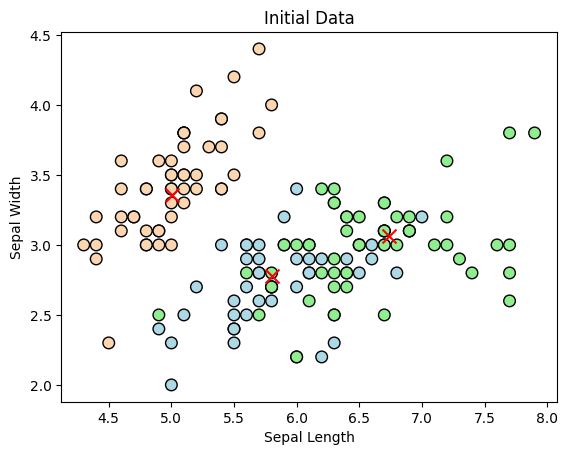

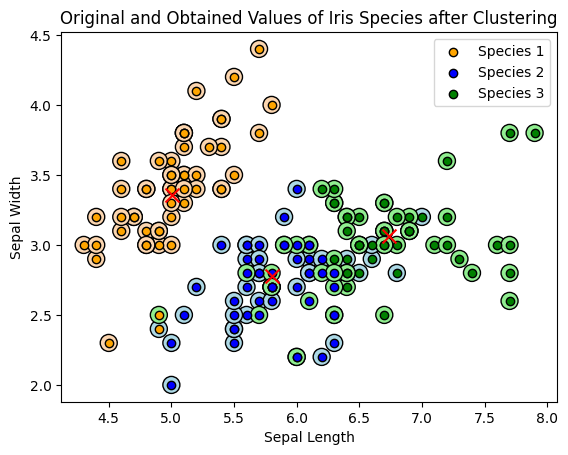

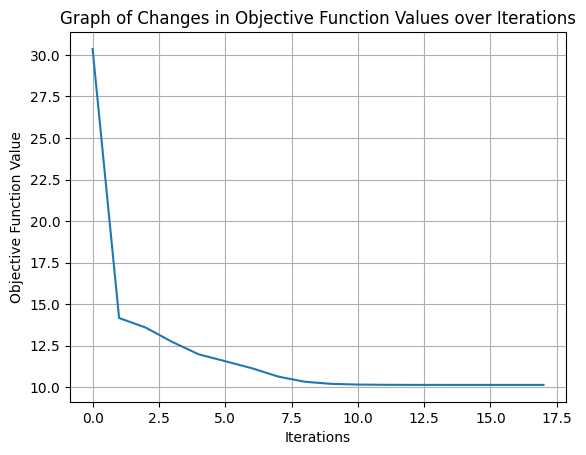

In [1]:
from matplotlib.colors import ListedColormap
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
x= iris.data[:, :2] # X values - width and length of the iris flower's sepals
y = iris.target # values of the species, we will compare them later with the results obtained from clustering

number_of_clasters = 3 # number of iris species

# perform clustering using the cmeans method
cntr, distribution_matrix, _, _, jm, _, _ = fuzz.cluster.cmeans(x.T, number_of_clasters, 3, error=0.005, maxiter=20, init=None)

# define colors
colors_def = ((0.99, 0.84, 0.69), (0.68, 0.85, 0.9), 'lightgreen')
def_color_map = ListedColormap(colors_def[:len(np.unique(y))])

# visualize the initial data and cluster centers
plt.title('Initial Data') 
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=def_color_map, edgecolor='black', s=70)
plt.scatter(cntr[:, 0], cntr[:, 1], marker='x', s=100, color='red')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

# determine which cluster each point belongs to (which species the iris flower belongs to)
fuzzy_labels = np.argmax(distribution_matrix, axis=0)
col_dictionary = {5.1: 'orange', 7.0: 'green', 5.5: 'blue'}
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=def_color_map, s=150, edgecolor='black')
for i in range(number_of_clasters):
    cluster_points = x[fuzzy_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Species {i + 1}', edgecolor='black', color=col_dictionary[cluster_points[0][0]])

plt.scatter(cntr[:, 0], cntr[:, 1], marker='x', s=100, color='red')

plt.title('Original and Obtained Values of Iris Species after Clustering') 
plt.xlabel('Sepal Length') 
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

# Graph of changes in the objective function values over iterations
plt.title('Graph of Changes in Objective Function Values over Iterations') 
plt.plot(jm)
plt.xlabel('Iterations')
plt.ylabel('Objective Function Value') 
plt.grid(True)
plt.show()
